<a href="https://colab.research.google.com/github/Yahya0210/project/blob/main/FordStayAlert1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Approach to the Machine Learning Problem

1.Load the data and load libraries
2.Data Preparation and Data Transformation
3.Data Visualization
4.Multivariate Analysis
5.Classification
6.Random Forest
7.Boosting
8.Hyper Parameter Tuning using Grid Search and Randomized Search

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
replace Solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train=pd.read_csv("fordTrain.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


<ipython-input-4-429728750c41>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['V4'])


<Axes: xlabel='V4', ylabel='Density'>

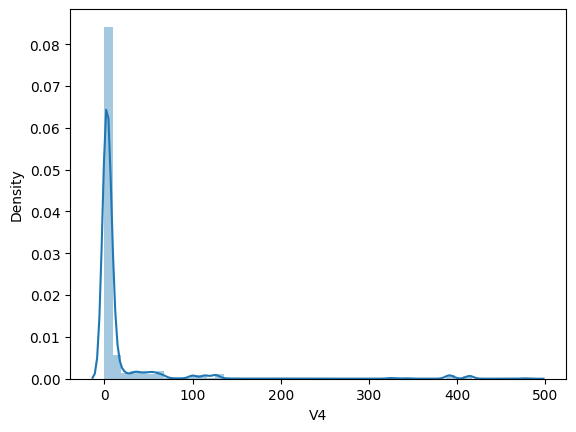

In [ ]:
sns.distplot(train['V4'])

In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<Axes: >

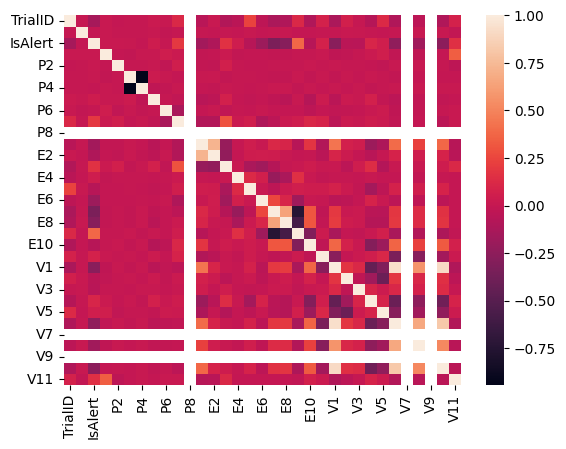

In [ ]:
sns.heatmap(train.corr())

split data

y=f(x)

seperating y and x terms

In [ ]:
x = train.iloc[:,3:]

In [ ]:
x.head()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [ ]:
y = train['IsAlert']


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsAlert, dtype: int64

In [ ]:
X_Train, X_Test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


Logistic Regression

In [ ]:
#Initialize the model
lr=LogisticRegression()
#train the model
lr.fit(X_Train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Implement Logistic Regression on test data


In [ ]:
y_hat_train = lr.predict(X_Train)
y_hat_test = lr.predict(X_Test)

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The accuraacy of the model is: ', acc_score)
  print(conf_matrix)
  print(clas_rep)


Train Accuracy

In [ ]:
model_eval(y_train, y_hat_train)

The accuraacy of the model is:  0.7143090577769137
[[130399  72928]
 [ 65193 214943]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    203327
           1       0.75      0.77      0.76    280136

    accuracy                           0.71    483463
   macro avg       0.71      0.70      0.71    483463
weighted avg       0.71      0.71      0.71    483463



In [ ]:
model_eval(y_test, y_hat_test)

The accuraacy of the model is:  0.7142786226068538
[[32998 18219]
 [16315 53334]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66     51217
           1       0.75      0.77      0.76     69649

    accuracy                           0.71    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.71      0.71      0.71    120866



Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_Train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_hat_train_rf = rf.predict(X_Train)
y_hat_test_rf = rf.predict(X_Test)

Train Accuracy

In [ ]:
model_eval(y_train, y_hat_train_rf)

The accuraacy of the model is:  1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test, y_hat_test_rf)

The accuraacy of the model is:  0.9949613621696755
[[50695   522]
 [   87 69562]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=200)
ada.fit(X_Train,y_train)

AdaBoostClassifier(n_estimators=200)

In [ ]:
y_hat_train_ada = ada.predict(X_Train)
y_hat_test_ada = ada.predict(X_Test)

In [ ]:
model_eval(y_train, y_hat_train_ada)

The accuraacy of the model is:  0.864717672293433
[[162539  40788]
 [ 24616 255520]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83    203327
           1       0.86      0.91      0.89    280136

    accuracy                           0.86    483463
   macro avg       0.87      0.86      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [ ]:
model_eval(y_test, y_hat_test_ada)

The accuraacy of the model is:  0.8647758674896165
[[40962 10255]
 [ 6089 63560]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     51217
           1       0.86      0.91      0.89     69649

    accuracy                           0.86    120866
   macro avg       0.87      0.86      0.86    120866
weighted avg       0.87      0.86      0.86    120866



In [ ]:
gb = GradientBoostingClassifier(n_estimators = 200)
gb.fit(X_Train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [ ]:
y_hat_train_gb = gb.predict(X_Train)
y_hat_test_gb = gb.predict(X_Test)

In [ ]:
model_eval(y_train, y_hat_train_gb)

The accuraacy of the model is:  0.9026212967693494
[[169860  33467]
 [ 13612 266524]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88    203327
           1       0.89      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.91      0.89      0.90    483463
weighted avg       0.90      0.90      0.90    483463



In [ ]:
model_eval(y_test, y_hat_test_gb)

The accuraacy of the model is:  0.902462230900336
[[42784  8433]
 [ 3356 66293]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     51217
           1       0.89      0.95      0.92     69649

    accuracy                           0.90    120866
   macro avg       0.91      0.89      0.90    120866
weighted avg       0.90      0.90      0.90    120866

